https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting

### コンペ概要
- 小売業のデータをモデル化する際の課題の一つは、限られた履歴に基づいて意思決定を行う必要があること。クリスマスが年に一度しか訪れないのであれば、戦略的な意思決定が収益にどのような影響を与えたのかを確認するチャンスはない。
- このコンペでは、さまざまな地域にあるWalmartの45店舗の過去の売上データが提供される。各店舗には多くの部門があり、参加者は各店舗の各部門の売上を予測しなければならない。
- さらに、データセットには休日のマークダウン(値下げ)イベントが含まれている。これらのマークダウンは売上に影響を与えることが知られているが、どの部門が影響を受け、どの程度の影響があるのかを予測することは困難。

### 評価指標
- WMAE(weighted mean absolute error)
- holiday weekは5倍の重みがつく

### submisson file
- Id: store + department + datetriplet
- weekly_salesを予測

### データ概要
- 異なる地域にあるWalmartの45店舗の過去の売上データ
- 各店舗にはいくつかの部門があり、各店舗の部門全体の売上を予測する必要がある
- Walmartは年間を通していくつかのプロモーション・マークダウン・イベントを行っている。これらのマークダウンは、スーパーボウル、レイバーデイ、サンクスギビング、クリスマスの4つの大きな祝日の前に行われます。これらの祝日を含む週は、祝日のない週に比べて5倍の評価となる。
- このコンペの課題の一つは、完全な、あるいは理想的な過去のデータがない中で、これらの祝日を含む週のマークダウンの効果をモデル化すること。


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_f = pd.read_csv('/content/drive/MyDrive/walmart_recruiting/data/features.csv.zip')
df_st = pd.read_csv('/content/drive/MyDrive/walmart_recruiting/data/stores.csv')
df_train = pd.read_csv('/content/drive/MyDrive/walmart_recruiting/data/train.csv.zip')
df_test = pd.read_csv('/content/drive/MyDrive/walmart_recruiting/data/test.csv.zip')
df_sample = pd.read_csv('/content/drive/MyDrive/walmart_recruiting/data/sampleSubmission.csv.zip')

In [ ]:
df_f.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df_st.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
df_sample.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


まずはStore, Deptの数を確認

In [ ]:
df_train.groupby(['Store', 'Dept']).size()

Store  Dept
1      1       143
       2       143
       3       143
       4       143
       5       143
              ... 
45     94      134
       95      143
       96        2
       97      143
       98      135
Length: 3331, dtype: int64

組み合わせは3331組。1store,1deptあたり140程のデータがあるが、数点しかない店舗もある

In [ ]:
df_train.groupby('Store')['Dept'].nunique()

Store
1     77
2     78
3     72
4     78
5     72
6     77
7     76
8     76
9     73
10    77
11    78
12    75
13    79
14    77
15    79
16    76
17    76
18    78
19    79
20    78
21    77
22    76
23    77
24    77
25    77
26    76
27    78
28    77
29    77
30    64
31    76
32    77
33    63
34    78
35    74
36    63
37    62
38    63
39    75
40    77
41    77
42    62
43    61
44    62
45    74
Name: Dept, dtype: int64

store毎にDeptの数が違う

targetをplot

In [ ]:
# 同じstore, 違うDept
def plot_target_store(store, df):
    # TODO: 祝日とか年の切れ目を分かりやすくした方がよい
    df_store = df[df['Store'] == store]
    for dept, grp in df_store.groupby('Dept'):
        print(f'store:{store}, Dept:{dept}')
        plt.figure(figsize=(12,1))
        plt.plot(grp['Date'], grp['Weekly_Sales'])
        plt.show()

store:1, Dept:1


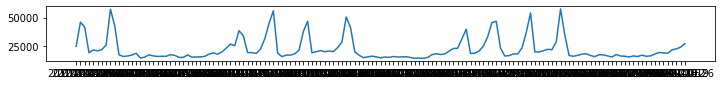

store:1, Dept:2


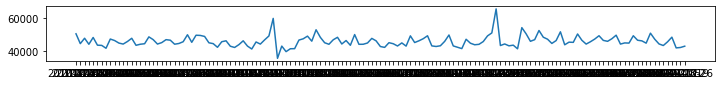

store:1, Dept:3


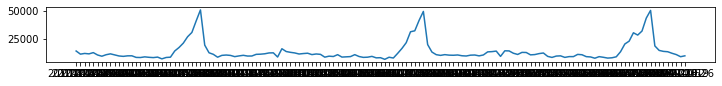

store:1, Dept:4


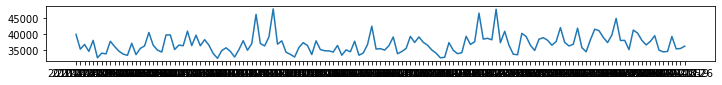

store:1, Dept:5


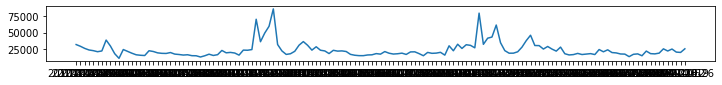

store:1, Dept:6


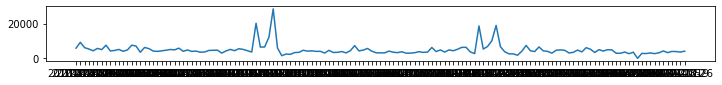

store:1, Dept:7


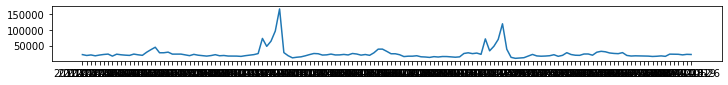

store:1, Dept:8


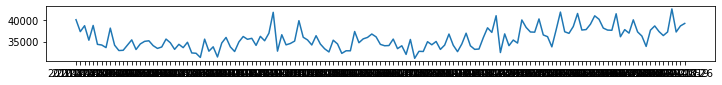

store:1, Dept:9


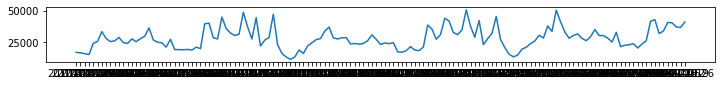

store:1, Dept:10


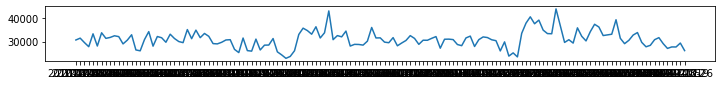

store:1, Dept:11


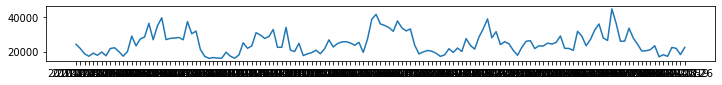

store:1, Dept:12


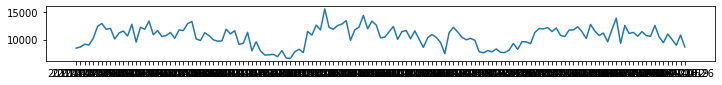

store:1, Dept:13


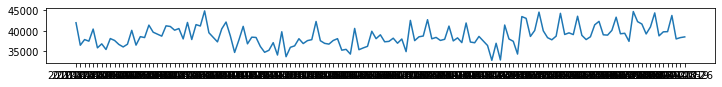

store:1, Dept:14


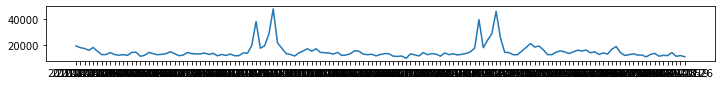

store:1, Dept:16


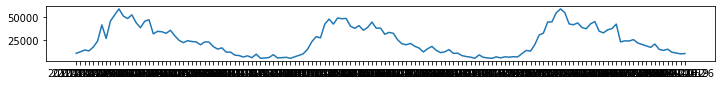

store:1, Dept:17


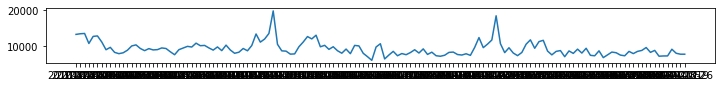

store:1, Dept:18


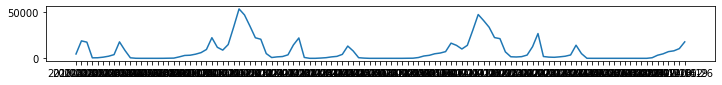

store:1, Dept:19


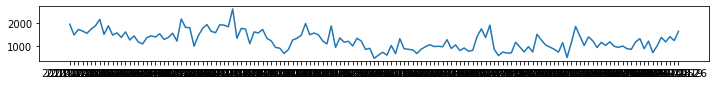

store:1, Dept:20


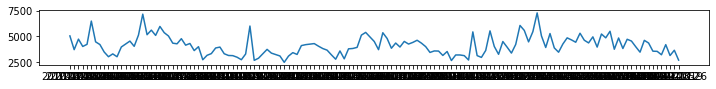

store:1, Dept:21


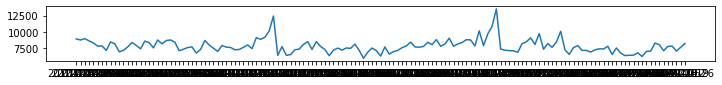

store:1, Dept:22


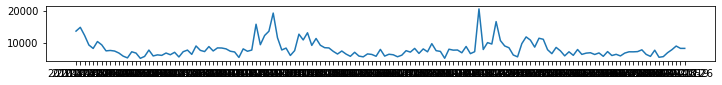

store:1, Dept:23


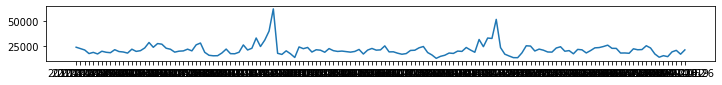

store:1, Dept:24


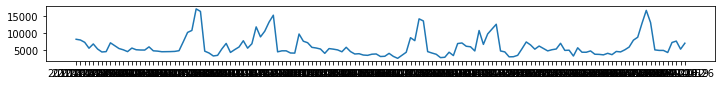

store:1, Dept:25


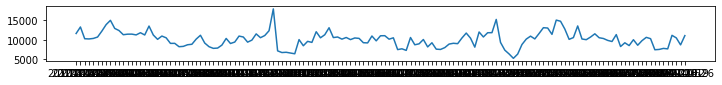

store:1, Dept:26


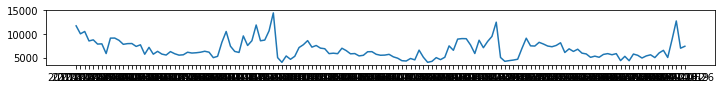

store:1, Dept:27


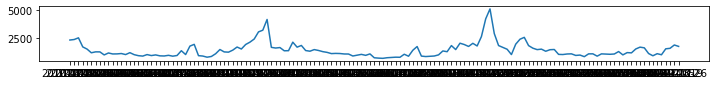

store:1, Dept:28


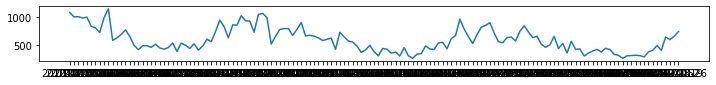

store:1, Dept:29


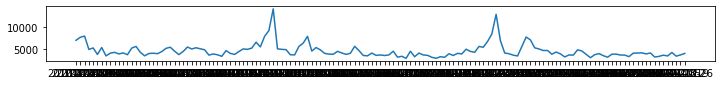

store:1, Dept:30


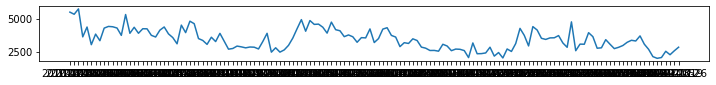

store:1, Dept:31


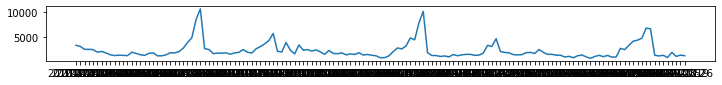

store:1, Dept:32


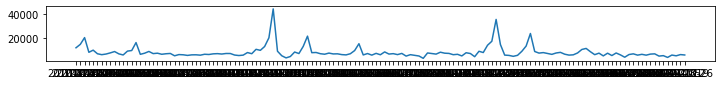

store:1, Dept:33


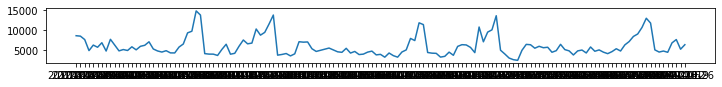

store:1, Dept:34


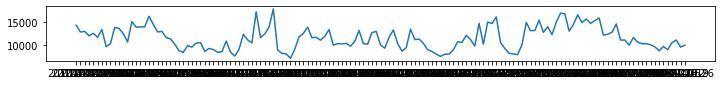

store:1, Dept:35


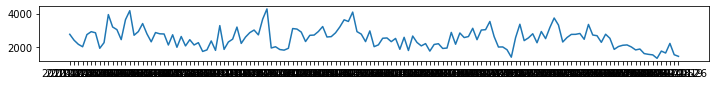

store:1, Dept:36


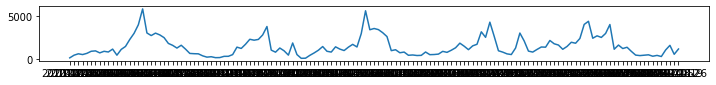

store:1, Dept:37


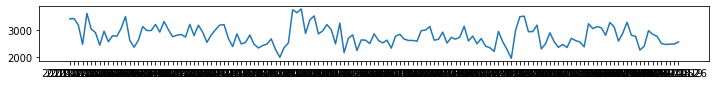

store:1, Dept:38


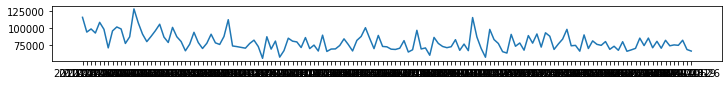

store:1, Dept:40


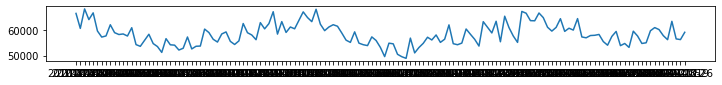

store:1, Dept:41


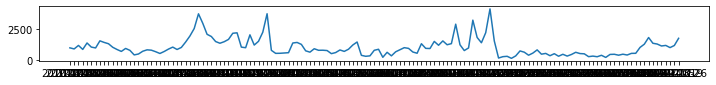

store:1, Dept:42


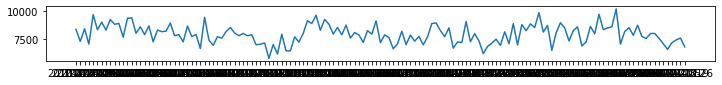

store:1, Dept:44


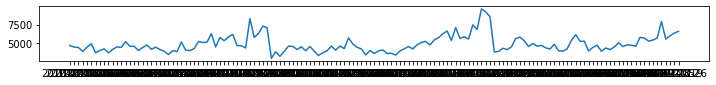

store:1, Dept:45


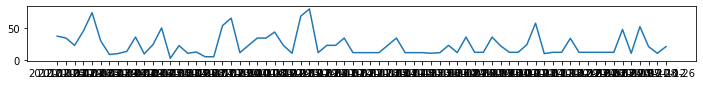

store:1, Dept:46


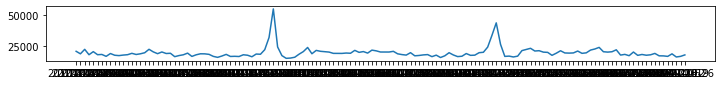

store:1, Dept:47


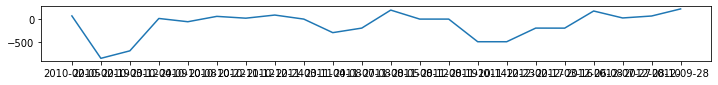

store:1, Dept:48


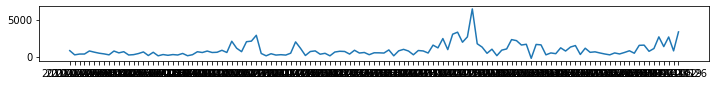

store:1, Dept:49


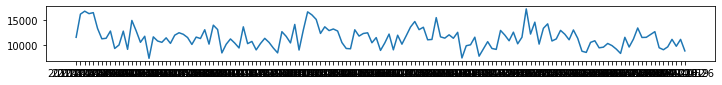

store:1, Dept:51


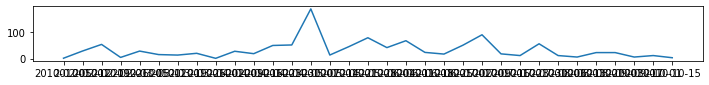

store:1, Dept:52


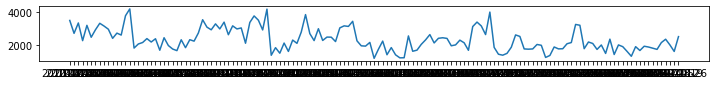

store:1, Dept:54


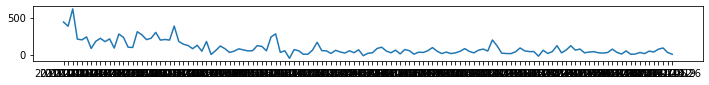

store:1, Dept:55


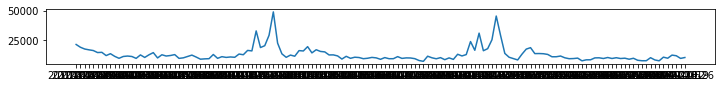

store:1, Dept:56


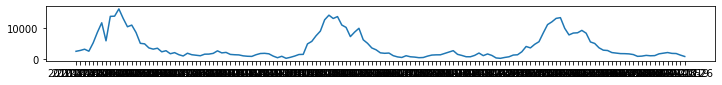

store:1, Dept:58


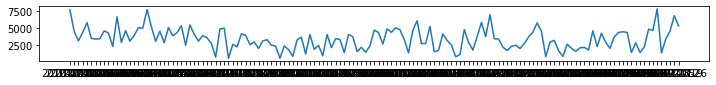

store:1, Dept:59


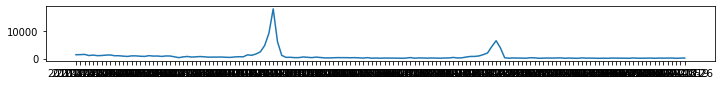

store:1, Dept:60


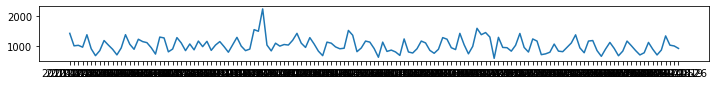

store:1, Dept:67


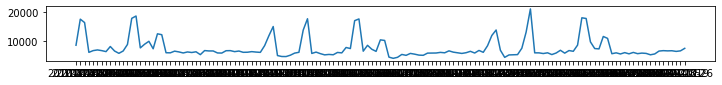

store:1, Dept:71


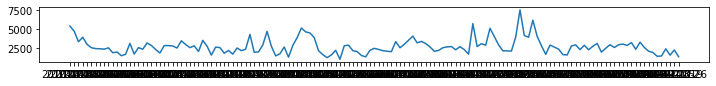

store:1, Dept:72


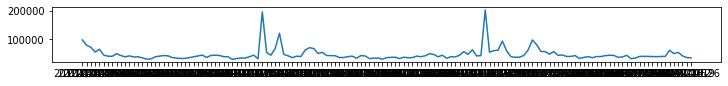

store:1, Dept:74


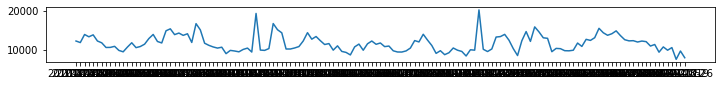

store:1, Dept:77


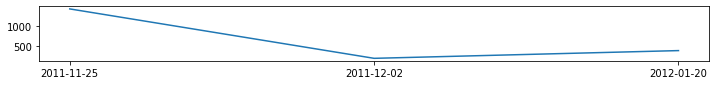

store:1, Dept:78


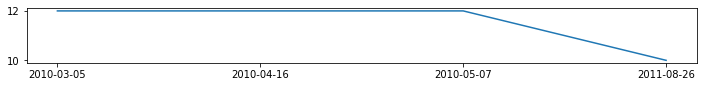

store:1, Dept:79


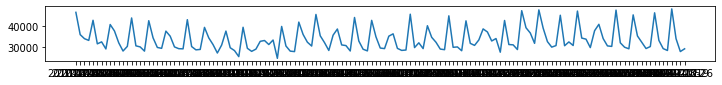

store:1, Dept:80


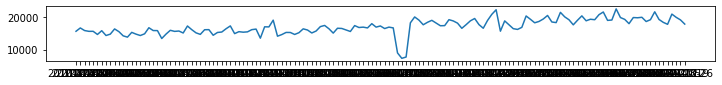

store:1, Dept:81


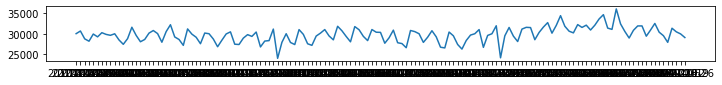

store:1, Dept:82


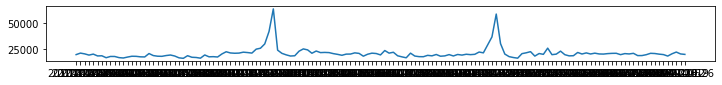

store:1, Dept:83


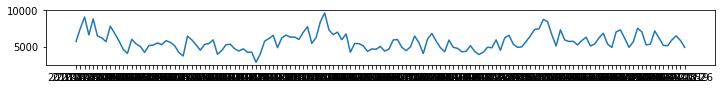

store:1, Dept:85


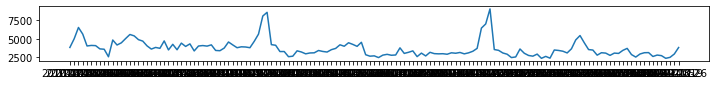

store:1, Dept:87


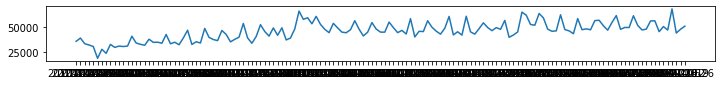

store:1, Dept:90


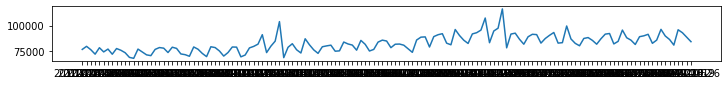

store:1, Dept:91


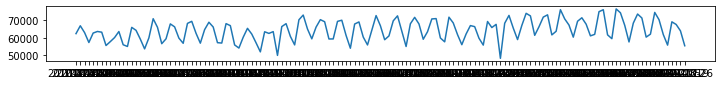

store:1, Dept:92


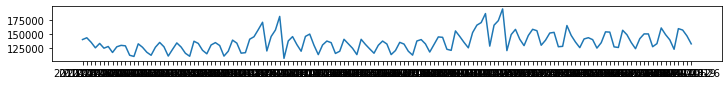

store:1, Dept:93


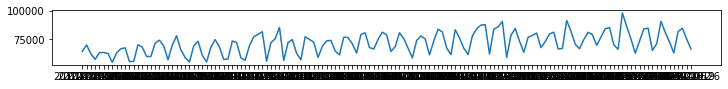

store:1, Dept:94


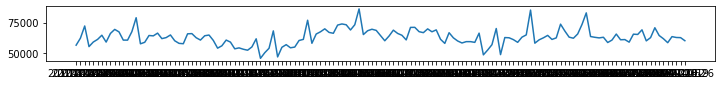

store:1, Dept:95


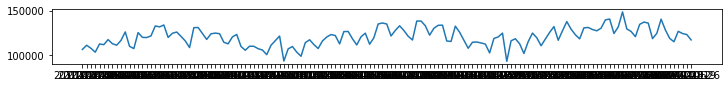

store:1, Dept:96


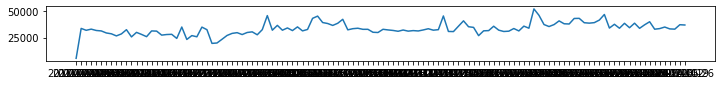

store:1, Dept:97


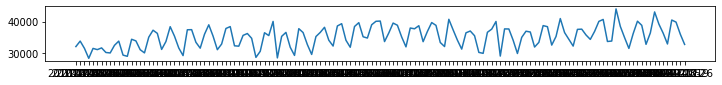

store:1, Dept:98


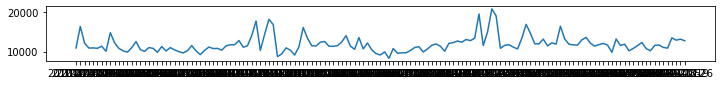

store:1, Dept:99


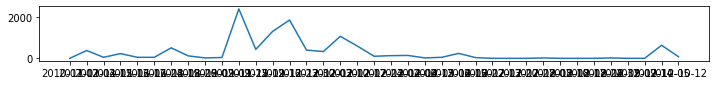

In [ ]:
plot_target_store(1, df_train)

- 同じstoreでもピークがくるタイミングは店舗によって異なる
- とはいえ、Dept4~7のように、だいたい同じ日付でピークが来ることも多い
- ピークに周期性がある。たぶん年単位で同じような売り上げになる？
- maxは店舗によって全然違う

- 年で大きく売り上げが変わることも少なそうなので、validationは年で分割して作れそう

In [ ]:
# 同じDept, 違うstore
def plot_target_dept(dept, df, df_store):
    # TODO: 祝日とか年の切れ目を分かりやすくした方がよい
    df_dept = df[df['Dept'] == dept]
    for store, grp in df_dept.groupby('Store'):
        store_type = df_store[df_store['Store'] == store]['Type'].iloc[0]
        print(f'store:{store}, Dept:{dept}, Type:{store_type}')
        plt.figure(figsize=(12,1))
        plt.plot(grp['Date'], grp['Weekly_Sales'])
        plt.show()

store:1, Dept:1, Type:A


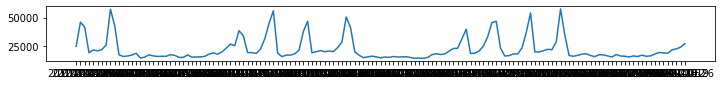

store:2, Dept:1, Type:A


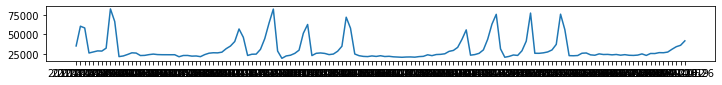

store:3, Dept:1, Type:B


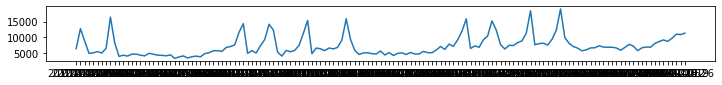

store:4, Dept:1, Type:A


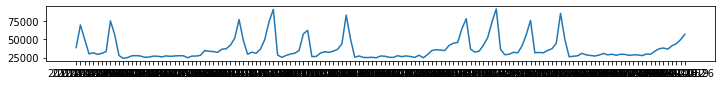

store:5, Dept:1, Type:B


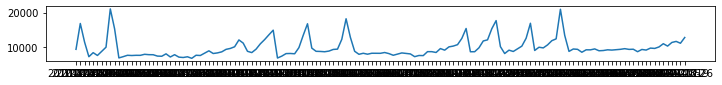

store:6, Dept:1, Type:A


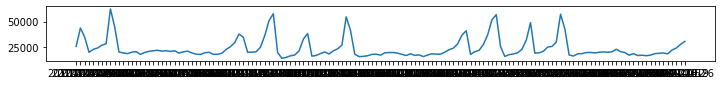

store:7, Dept:1, Type:B


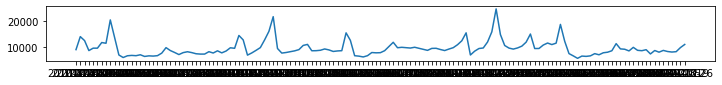

store:8, Dept:1, Type:A


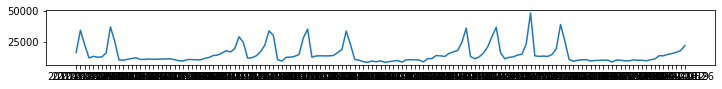

store:9, Dept:1, Type:B


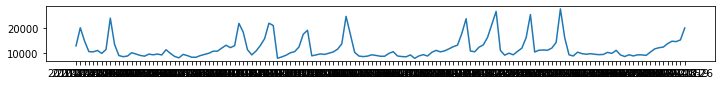

store:10, Dept:1, Type:B


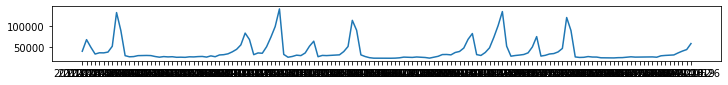

store:11, Dept:1, Type:A


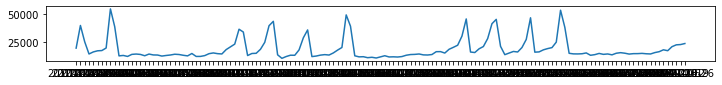

store:12, Dept:1, Type:B


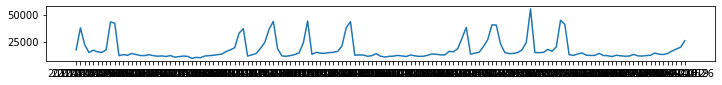

store:13, Dept:1, Type:A


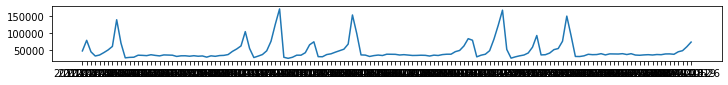

store:14, Dept:1, Type:A


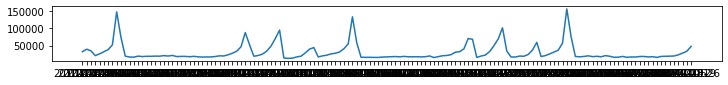

store:15, Dept:1, Type:B


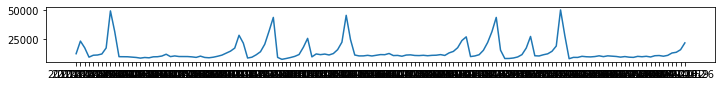

store:16, Dept:1, Type:B


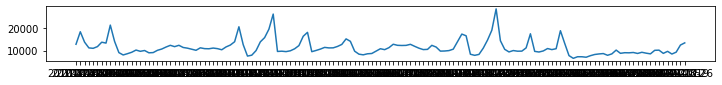

store:17, Dept:1, Type:B


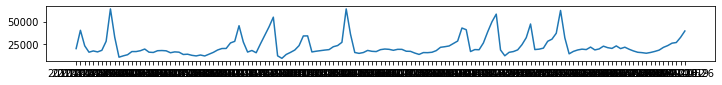

store:18, Dept:1, Type:B


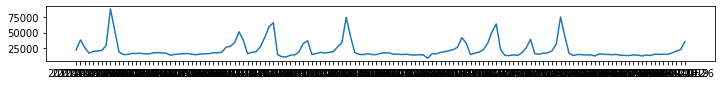

store:19, Dept:1, Type:A


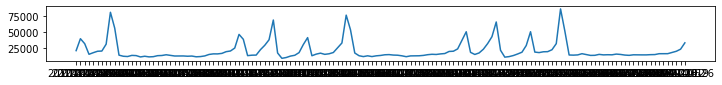

store:20, Dept:1, Type:A


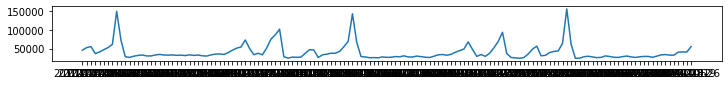

store:21, Dept:1, Type:B


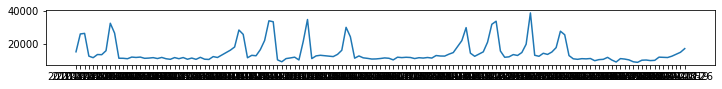

store:22, Dept:1, Type:B


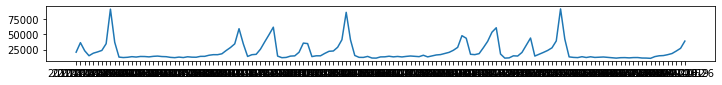

store:23, Dept:1, Type:B


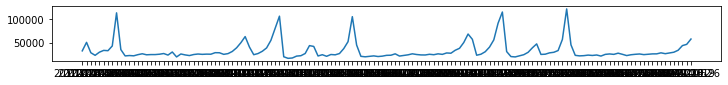

store:24, Dept:1, Type:A


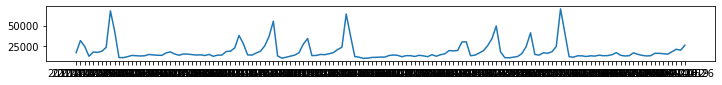

store:25, Dept:1, Type:B


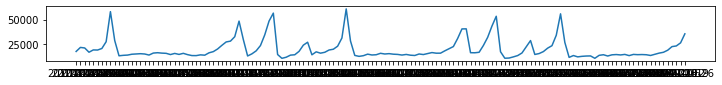

store:26, Dept:1, Type:A


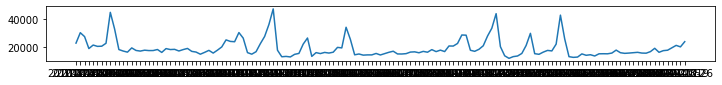

store:27, Dept:1, Type:A


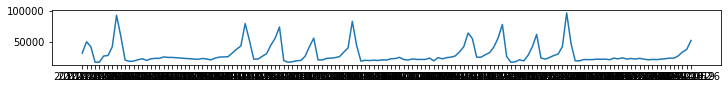

store:28, Dept:1, Type:A


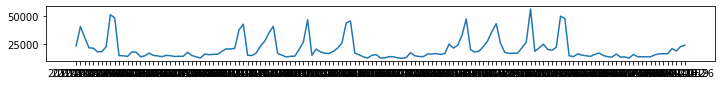

store:29, Dept:1, Type:B


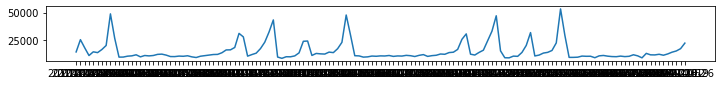

store:30, Dept:1, Type:C


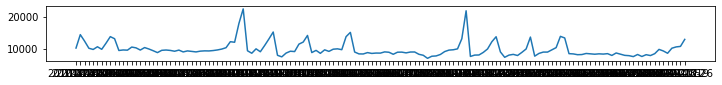

store:31, Dept:1, Type:A


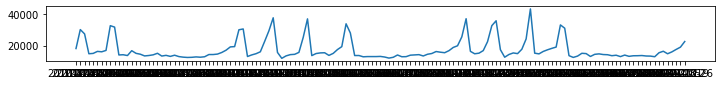

store:32, Dept:1, Type:A


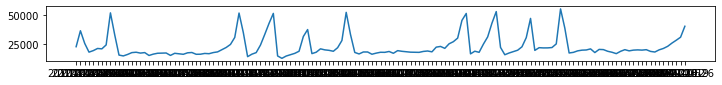

store:33, Dept:1, Type:A


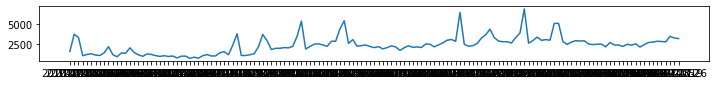

store:34, Dept:1, Type:A


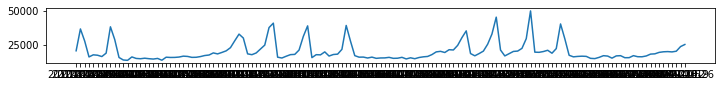

store:35, Dept:1, Type:B


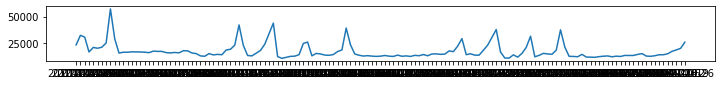

store:36, Dept:1, Type:A


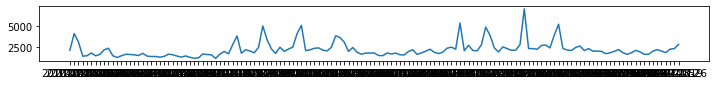

store:37, Dept:1, Type:C


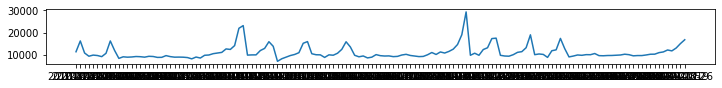

store:38, Dept:1, Type:C


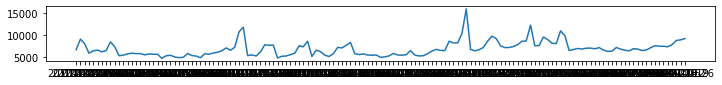

store:39, Dept:1, Type:A


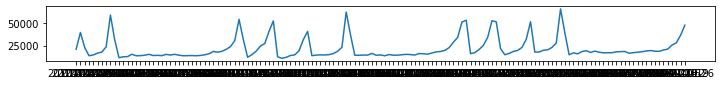

store:40, Dept:1, Type:A


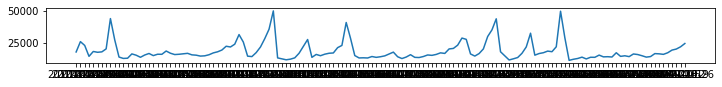

store:41, Dept:1, Type:A


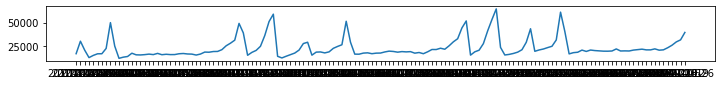

store:42, Dept:1, Type:C


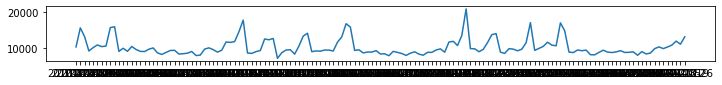

store:43, Dept:1, Type:C


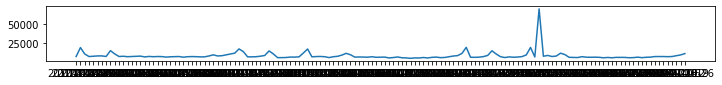

store:44, Dept:1, Type:C


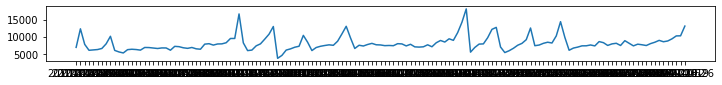

store:45, Dept:1, Type:B


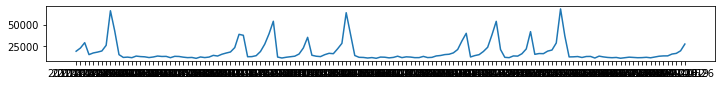

In [ ]:
plot_target_dept(1, df_train, df_st)

store:1, Dept:2, Type:A


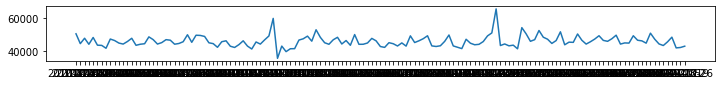

store:2, Dept:2, Type:A


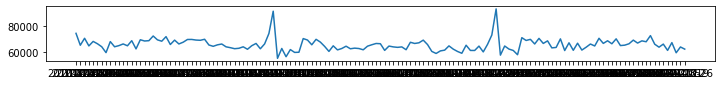

store:3, Dept:2, Type:B


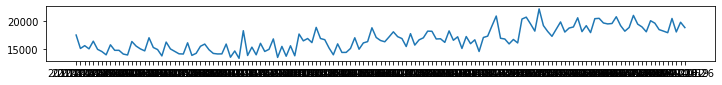

store:4, Dept:2, Type:A


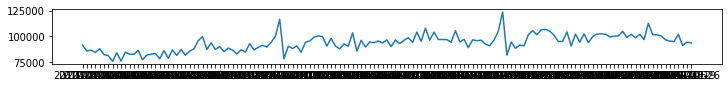

store:5, Dept:2, Type:B


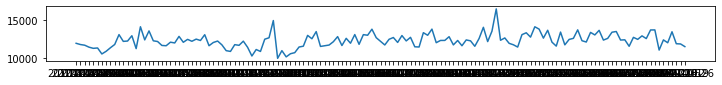

store:6, Dept:2, Type:A


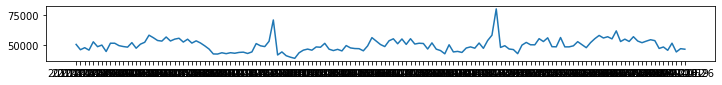

store:7, Dept:2, Type:B


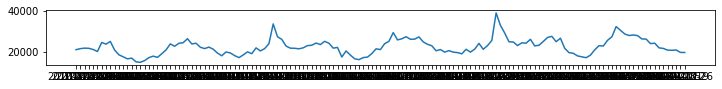

store:8, Dept:2, Type:A


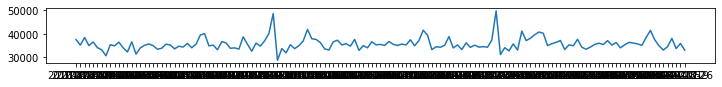

store:9, Dept:2, Type:B


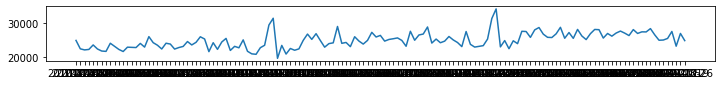

store:10, Dept:2, Type:B


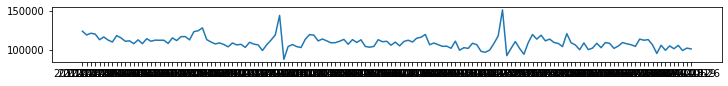

store:11, Dept:2, Type:A


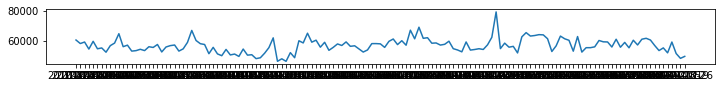

store:12, Dept:2, Type:B


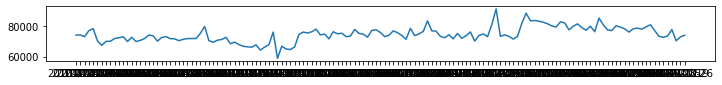

store:13, Dept:2, Type:A


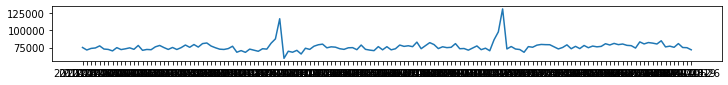

store:14, Dept:2, Type:A


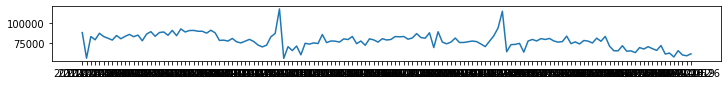

store:15, Dept:2, Type:B


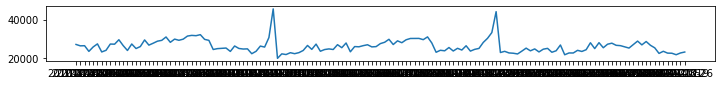

store:16, Dept:2, Type:B


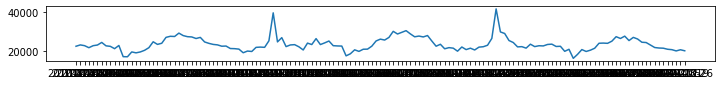

store:17, Dept:2, Type:B


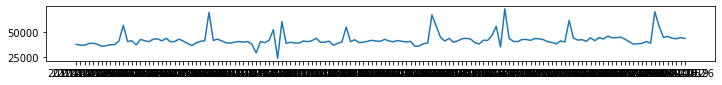

store:18, Dept:2, Type:B


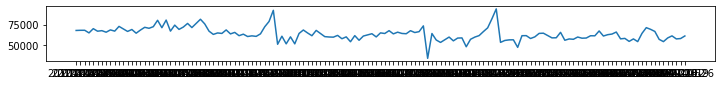

store:19, Dept:2, Type:A


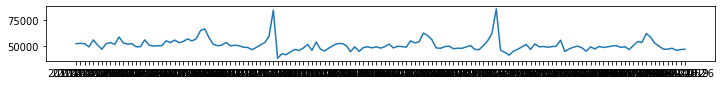

store:20, Dept:2, Type:A


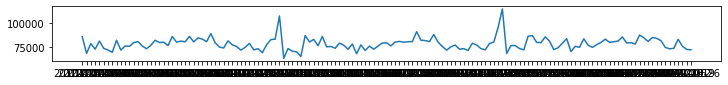

store:21, Dept:2, Type:B


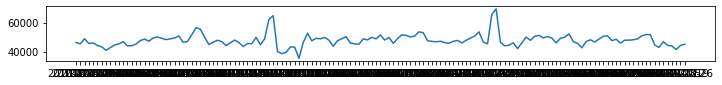

store:22, Dept:2, Type:B


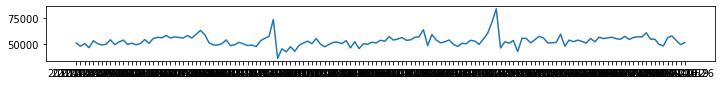

store:23, Dept:2, Type:B


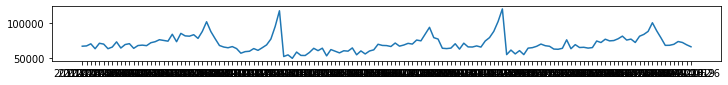

store:24, Dept:2, Type:A


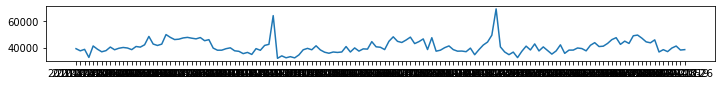

store:25, Dept:2, Type:B


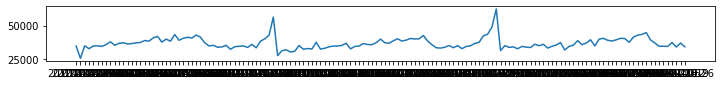

store:26, Dept:2, Type:A


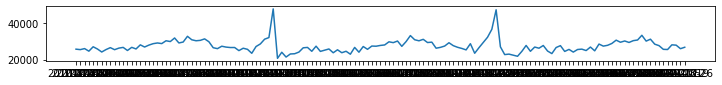

store:27, Dept:2, Type:A


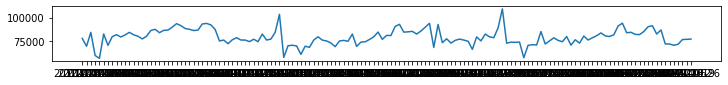

store:28, Dept:2, Type:A


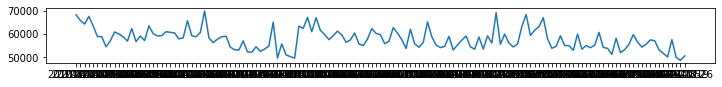

store:29, Dept:2, Type:B


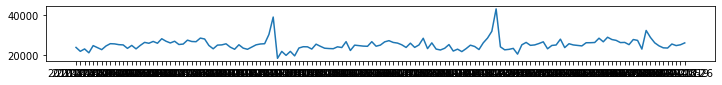

store:30, Dept:2, Type:C


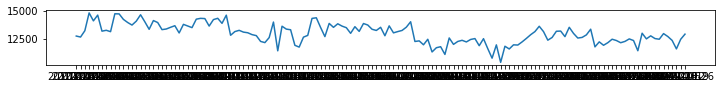

store:31, Dept:2, Type:A


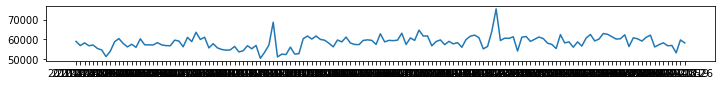

store:32, Dept:2, Type:A


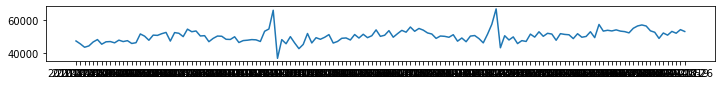

store:33, Dept:2, Type:A


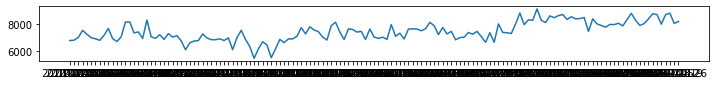

store:34, Dept:2, Type:A


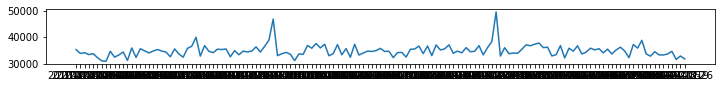

store:35, Dept:2, Type:B


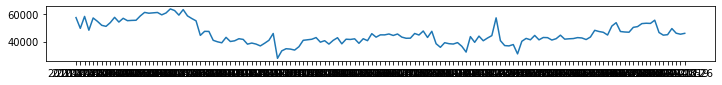

store:36, Dept:2, Type:A


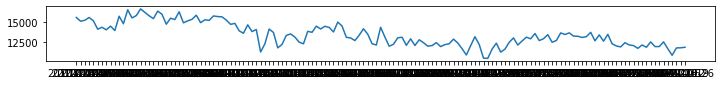

store:37, Dept:2, Type:C


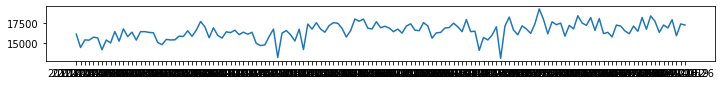

store:38, Dept:2, Type:C


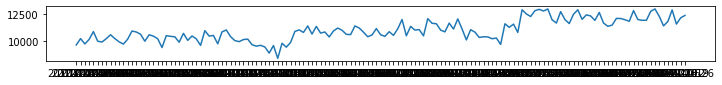

store:39, Dept:2, Type:A


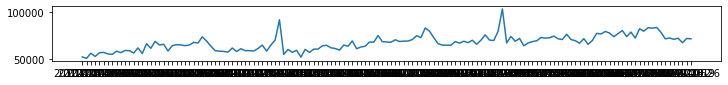

store:40, Dept:2, Type:A


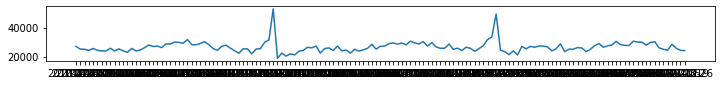

store:41, Dept:2, Type:A


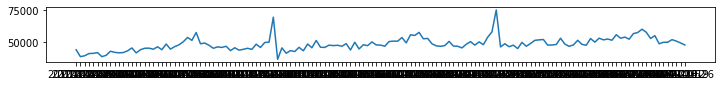

store:42, Dept:2, Type:C


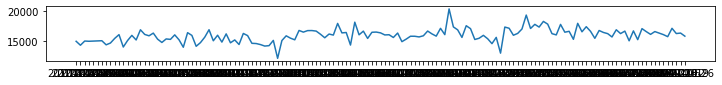

store:43, Dept:2, Type:C


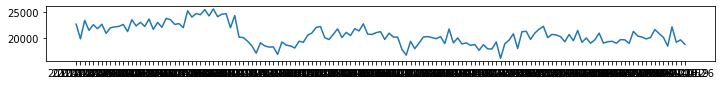

store:44, Dept:2, Type:C


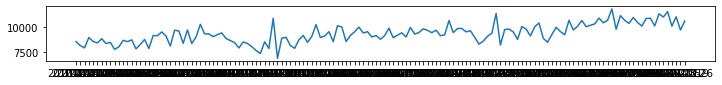

store:45, Dept:2, Type:B


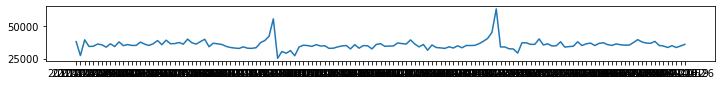

In [ ]:
plot_target_dept(2, df_train, df_st)

- 違うstoreでも同じdeptであれば、かなり近い変化をしている
- maxはstoreによって違う
- Typeに関して、Dept1はあまり関係なさそうだが、Dept2のstore42-44のtype:Cが変な動きをしているように見える